<a href="https://colab.research.google.com/github/Wickramasingh/Research-MA_Project/blob/main/youtube_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


#2.Data Loading

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = 'Top Youtubers Dataset.csv'
df = pd.read_csv(file_path, encoding='latin1')

df.head()

,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,1,MrBeast,284000000,5.240290e+10,803,Entertainment,2012
1,2,T-Series,268000000,2.590000e+11,21237,Music,2006
2,3,YouTube Movies,181000000,0.000000e+00,0,Film & Animation,2015
3,4,Cocomelon - Nursery Rhymes,177000000,1.830000e+11,1188,Education,2006
4,5,SET India,174000000,1.650000e+11,139720,Shows,2006


#3.Data Cleaning and Preprocessing

In [9]:
# Remove any duplicate rows
df = df.drop_duplicates()
# Remove rows missing values
df = df.dropna(subset=['Category', 'Subscribers', 'Video Views', 'Video Count', 'Started'])
# Convert 'Started' column to numeric if it's not already
df['Started'] = pd.to_numeric(df['Started'], errors='coerce')
# Drop rows where 'Started' could not be converted to numeric
df = df.dropna(subset=['Started'])
# Ensure 'Subscribers' is numeric
df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce')
# Drop rows where 'Subscribers' could not be converted to numeric
df = df.dropna(subset=['Subscribers'])
# Drop rows where 'Video Views' or 'Video Count' are not numeric or have missing values
df['Video Views'] = pd.to_numeric(df['Video Views'], errors='coerce')
df['Video Count'] = pd.to_numeric(df['Video Count'], errors='coerce')
df = df.dropna(subset=['Video Views', 'Video Count'])
df = df[(df['Subscribers'] != 0) & (df['Video Views'] != 0) & (df['Video Count'] != 0)]

df.head(10)


,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,1,MrBeast,284000000,5.240290e+10,803,Entertainment,2012
1,2,T-Series,268000000,2.590000e+11,21237,Music,2006
3,4,Cocomelon - Nursery Rhymes,177000000,1.830000e+11,1188,Education,2006
4,5,SET India,174000000,1.650000e+11,139720,Shows,2006
5,6,Kids Diana Show,123000000,1.040000e+11,1230,People & Blogs,2015
7,8,Vlad and Niki,120000000,9.164619e+10,730,Entertainment,2018
8,9,Like Nastya,116000000,1.010000e+11,886,People & Blogs,2016
9,10,PewDiePie,111000000,2.932116e+10,4767,Gaming,2010
10,11,Zee Music Company,108000000,6.721699e+10,11377,Music,2014
11,12,WWE,102000000,8.538498e+10,77038,Sports,2007


#1. Subscriber Prediction

# 1. Linear Regression model

In [10]:
X = df[['Video Views', 'Video Count','Started', 'Category']]
y = df['Subscribers']

#Model Training

In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Category'])
    ],
    remainder='passthrough'
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Evaluation

In [57]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression model - Mean Absolute Error: {mae}")
print(f"Linear Regression model - R-squared: {r2}")
print(f"Linear Regression model - Root Mean Squared Error (RMSE): {rmse}")

Linear Regression model - Mean Absolute Error: 6112753.284050408
Linear Regression model - R-squared: 0.4337873099089734
Linear Regression model - Root Mean Squared Error (RMSE): 8240008.113860059


#Visualization

In [58]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred
})
comparison_df['Predicted Subscribers'] = comparison_df['Predicted Subscribers'].apply(lambda x: f"{x:.0f}")
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred,
    'Category': X_test_with_names['Category']
})
comparison_df.head(10)

,Channel Name,Category,Actual Subscribers,Predicted Subscribers
359,Amit Bhadana,Entertainment,24400000,15972259
905,Airrack,Entertainment,15200000,16439229
548,GRAMMY GOLD OFFICIAL,Music,19800000,34757789
571,AMARINTV,Entertainment,19400000,19948700
717,CRAZY GREAPA,Entertainment,17100000,26907235
142,BabyBus - Kids Songs and Cartoons,Education,36800000,41109423
222,Karla Bustillos,Entertainment,31200000,21278153
176,Dangal TV Channel,Entertainment,34100000,35902286
91,Like Nastya Show,Entertainment,43300000,33175615
294,Smosh,Comedy,26600000,23925677


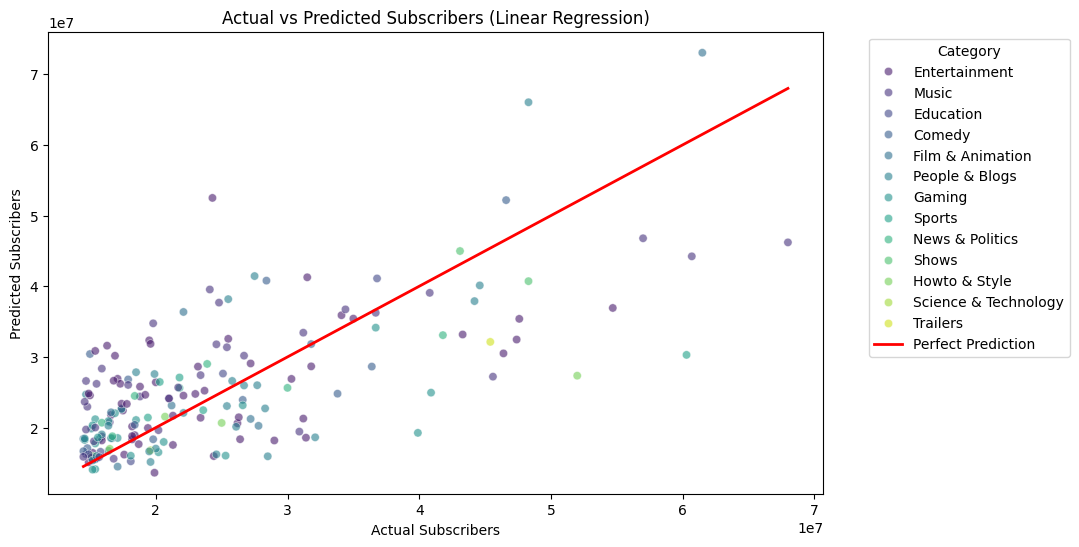

In [59]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred,
    'Category': X_test_with_names['Category']
})

#scatter plot with color-coded categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Subscribers', y='Predicted Subscribers', hue='Category', data=plot_df, alpha=0.6, palette='viridis')

#prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Subscribers (Linear Regression)', fontsize=12)
plt.xlabel('Actual Subscribers', fontsize=10)
plt.ylabel('Predicted Subscribers', fontsize=10)

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Linear Regression R-squared Comparison with Existing Works

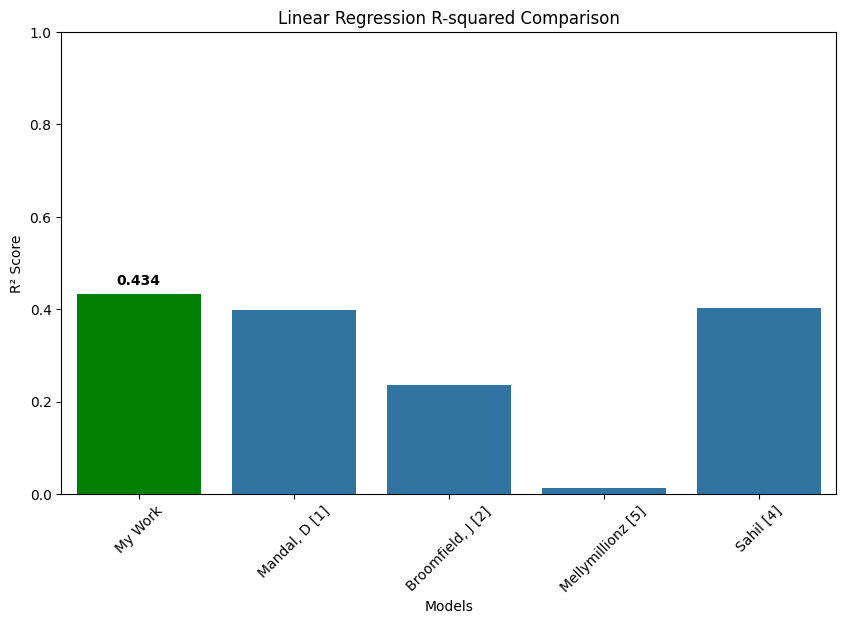

In [60]:
# Calculate R² score for my model
r2 = r2_score(y_test, y_pred)

# Existing R² scores from research papers
r2_existing_works = [
    0.399,  # Mandal, D
    0.236,  # Broomfield, J
    0.012,  # Mellymillionz
    0.403   # Sahil
]

# Combine my R² with existing works
r2_scores = [r2] + r2_existing_works

# Model names for comparison
models = [
    'My Work',
    'Mandal, D [1]',
    'Broomfield, J [2]',
    'Mellymillionz [5]',
    'Sahil [4]'
]

# Identify the highest R² score and its index
max_r2 = max(r2_scores)
max_index = r2_scores.index(max_r2)

# Plotting R² Scores
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=models, y=r2_scores)

 # Highlight the highest bar in green
bars.patches[max_index].set_facecolor('green')
plt.text(max_index, max_r2 + 0.02, f'{max_r2:.3f}', ha='center', color='black', weight='bold')

# Titles and labels
plt.title('Linear Regression R-squared Comparison')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.show()


# 2. Random Forest

#Model Training

In [61]:
# model using RandomForestRegressor
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
# Train the new model
random_forest_model.fit(X_train, y_train)

# Predict using the new model
y_pred_rf = random_forest_model.predict(X_test)


#Model Evaluation

In [62]:
# performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Absolute Error:: {mae_rf}')
print(f'Random Forest - R-squared: {r2_rf}')


Random Forest - Mean Absolute Error:: 6251114.583333333
Random Forest - R-squared: 0.30161115453058795


#Visualization

In [63]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf
})
comparison_df['Predicted Subscribers'] = comparison_df['Predicted Subscribers'].apply(lambda x: f"{x:.0f}")
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf,
    'Category': X_test_with_names['Category']
})
comparison_df.head(10)

,Channel Name,Category,Actual Subscribers,Predicted Subscribers
359,Amit Bhadana,Entertainment,24400000,17283000
905,Airrack,Entertainment,15200000,19351000
548,GRAMMY GOLD OFFICIAL,Music,19800000,29595000
571,AMARINTV,Entertainment,19400000,19361000
717,CRAZY GREAPA,Entertainment,17100000,25330000
142,BabyBus - Kids Songs and Cartoons,Education,36800000,41481000
222,Karla Bustillos,Entertainment,31200000,23440000
176,Dangal TV Channel,Entertainment,34100000,33009000
91,Like Nastya Show,Entertainment,43300000,36229000
294,Smosh,Comedy,26600000,22783000


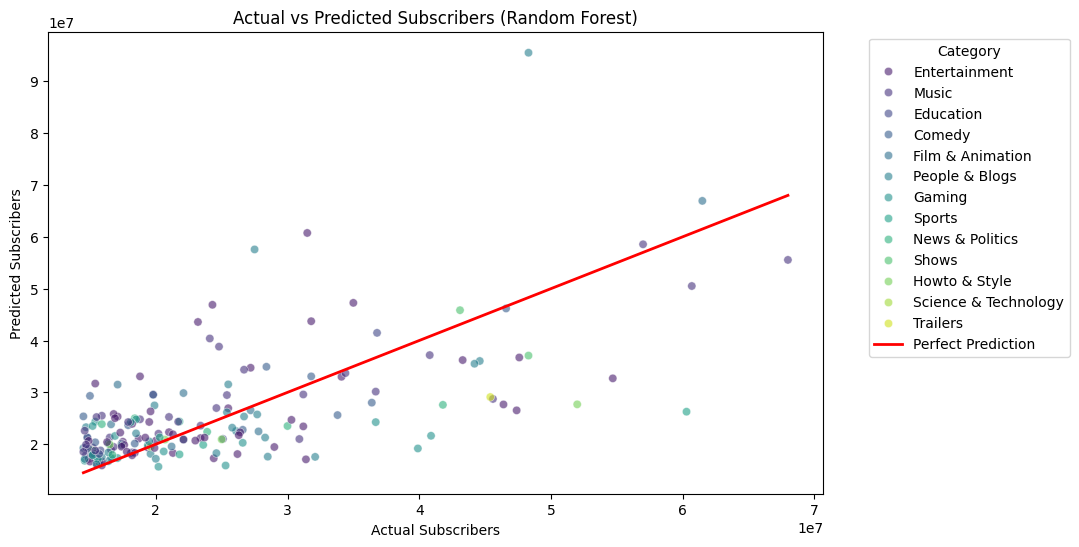

In [64]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf,
    'Category': X_test_with_names['Category']
})

#scatter plot with color-coded categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Subscribers', y='Predicted Subscribers', hue='Category', data=plot_df, alpha=0.6, palette='viridis')

#prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Subscribers (Random Forest)', fontsize=12)
plt.xlabel('Actual Subscribers', fontsize=10)
plt.ylabel('Predicted Subscribers', fontsize=10)

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#Random Forest R-squared Comparison with Existing Works

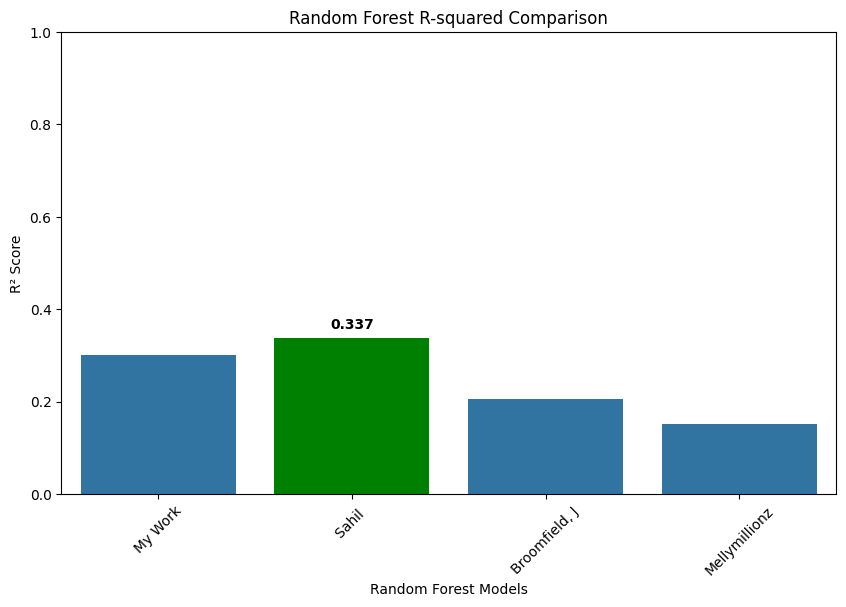

In [65]:
# Calculate R² score for my model
r2_rf = r2_score(y_test, y_pred_rf)

# Existing R² scores from research papers
r2_existing_works = [
    0.337,  # Sahil
    0.205,  # Broomfield, J
    0.152,  # Mellymillionz
]

# Combine my R² with existing works
r2_scores = [r2_rf] + r2_existing_works

# Model names for comparison
models = [
    'My Work',
    'Sahil ',
    'Broomfield, J',
    'Mellymillionz'
]

# Identify the highest R² score and its index
max_r2 = max(r2_scores)
max_index = r2_scores.index(max_r2)

# Plotting R² Scores
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=models, y=r2_scores)

# Highlight the highest bar in green
bars.patches[max_index].set_facecolor('green')
plt.text(max_index, max_r2 + 0.02, f'{max_r2:.3f}', ha='center', color='black', weight='bold')

# Titles and labels
plt.title('Random Forest R-squared Comparison')
plt.xlabel('Random Forest Models')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.show()


#3. XGBoost Model

#Model Training

In [5]:
# dataframe
df['Log_Subscribers'] = np.log1p(df['Subscribers'])
df['Log_Video_Views'] = np.log1p(df['Video Views'])
df['Log_Video_Count'] = np.log1p(df['Video Count'])

# Encoding categorical feature
df['Category'] = LabelEncoder().fit_transform(df['Category'])

# Splitting the data
X = df[['Log_Video_Views', 'Log_Video_Count', 'Category', 'Started']]
y = df['Log_Subscribers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBRegressor()
model.fit(X_train_scaled, y_train)

#predictions
y_pred_xg = model.predict(X_test_scaled)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# Grid Search with cross-validation
grid = GridSearchCV(XGBRegressor(), param_grid, scoring='r2', cv=5)
grid.fit(X_train_scaled, y_train)

y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_xg)

# Calculate MAE and MSE on original scale
mae_original = mean_absolute_error(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)


#Model Evaluation

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: OneHotEncoder for 'Category' column
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Category'])
    ],
    remainder='passthrough'
)

# Define the pipeline with XGBoost
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3))
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"XGBoost model - Mean Absolute Error: {mae}")
print(f"XGBoost model - R-squared: {grid.best_score_}")
print(f"XGBoost model - Root Mean Squared Error (RMSE): {rmse}")


XGBoost model - Mean Absolute Error: 6017127.723958333
XGBoost model - R-squared: 0.5169039295744934
XGBoost model - Root Mean Squared Error (RMSE): 8377020.472944418


#Visualization

In [14]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred
})
comparison_df['Predicted Subscribers'] = comparison_df['Predicted Subscribers'].apply(lambda x: f"{x:.0f}")
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred,
    'Category': X_test_with_names['Category']
})
comparison_df.head(10)



,Channel Name,Category,Actual Subscribers,Predicted Subscribers
359,Amit Bhadana,Entertainment,24400000,19489810
905,Airrack,Entertainment,15200000,22737272
548,GRAMMY GOLD OFFICIAL,Music,19800000,30760502
571,AMARINTV,Entertainment,19400000,16870908
717,CRAZY GREAPA,Entertainment,17100000,23151600
142,BabyBus - Kids Songs and Cartoons,Education,36800000,43777036
222,Karla Bustillos,Entertainment,31200000,20392894
176,Dangal TV Channel,Entertainment,34100000,25628356
91,Like Nastya Show,Entertainment,43300000,30309202
294,Smosh,Comedy,26600000,21333910


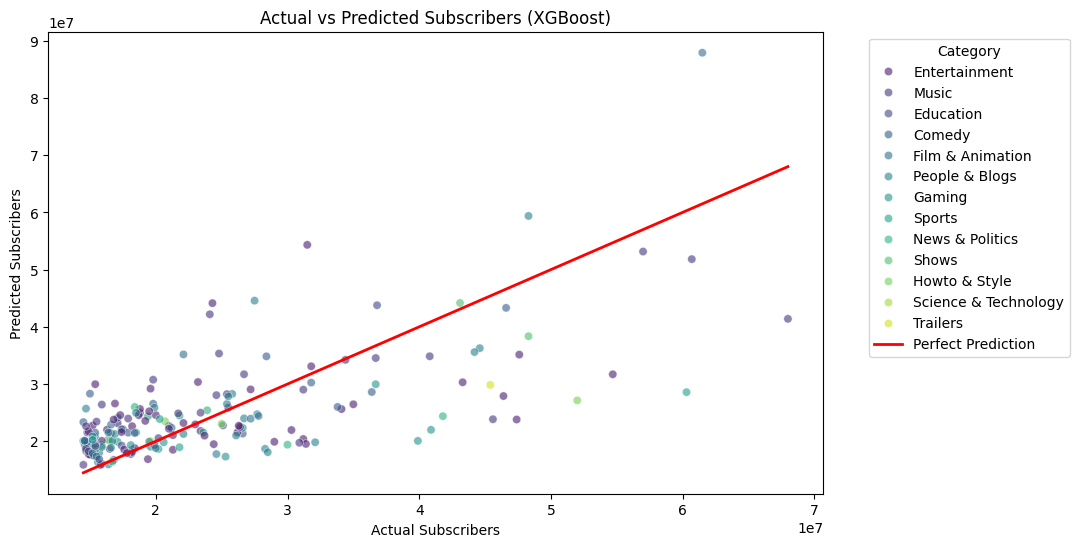

In [15]:
# Add channel names and categories for comparison
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

# Scatter plot with color-coded categories
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred,
    'Category': X_test_with_names['Category']
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Subscribers', y='Predicted Subscribers', hue='Category', data=plot_df, alpha=0.6, palette='viridis')

# Prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Subscribers (XGBoost)', fontsize=12)
plt.xlabel('Actual Subscribers', fontsize=10)
plt.ylabel('Predicted Subscribers', fontsize=10)

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#Model Comparison - R2 Score

In [ ]:
models = ['Linear Regression', 'Random Forest','XGBoost']
r2 = [
    r2_score(y_test, y_pred),
    r2_score(y_test, y_pred_rf),
    grid.best_score_
]

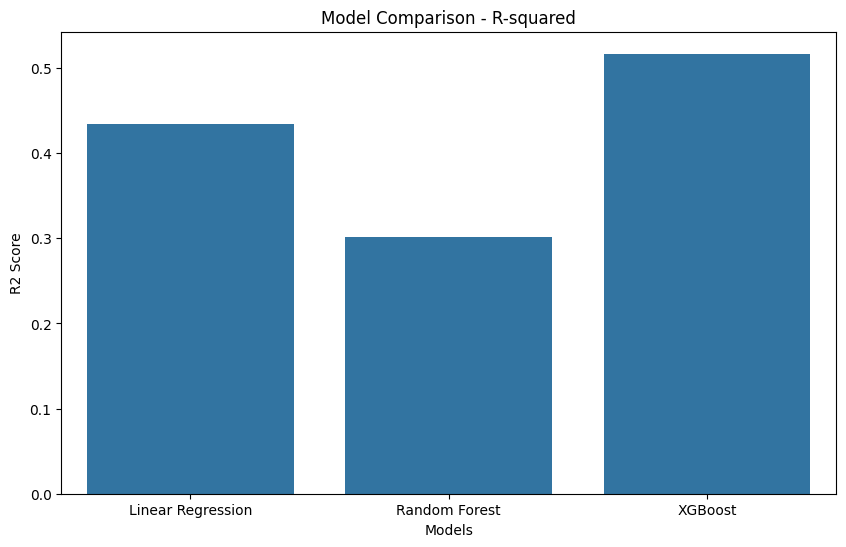

In [ ]:
# Plotting R2 Score
plt.figure(figsize=(10, 6))
sns.barplot(x = models, y = r2)
plt.title('Model Comparison - R-squared')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()

#2.Engagement Classification

#1.Random Forest

In [75]:
# Create an engagement metric
df['Average_Views_Per_Video'] = df['Video Views'] / df['Video Count']

# Calculate the median of Average Views per Video
median_avg_views = df['Average_Views_Per_Video'].median()
print(f"Median of Average Views per Video: {median_avg_views}")

# Engagement class based on average views per video
df['Engagement_Class'] = pd.cut(df['Average_Views_Per_Video'],
                                 bins=[-1, median_avg_views, float('inf')],
                                 labels=['Low', 'High'])

# Print engagement classes
print("Engagement Classes defined as follows:")
print(f"Channels with Average Views <= {median_avg_views:.2f} are classified as 'Low'")
print(f"Channels with Average Views > {median_avg_views:.2f} are classified as 'High'")

# Features and target variable
X = df[['Subscribers', 'Video Count', 'Video Views', 'Started', 'Category']]
y = df['Engagement_Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
categorical_features = ['Category']  # Categorical feature
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# preprocessing pipelines for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


Median of Average Views per Video: 6305070.109508911
Engagement Classes defined as follows:
Channels with Average Views <= 6305070.11 are classified as 'Low'
Channels with Average Views > 6305070.11 are classified as 'High'


#Classification Report

In [76]:
# Create a Random Forest Classifier pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict using the model
y_pred_rf = pipeline.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

        High       0.92      0.94      0.93        90
         Low       0.95      0.93      0.94       102

    accuracy                           0.94       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.94      0.94      0.94       192

Confusion Matrix:
[[85  5]
 [ 7 95]]


#Visualization

In [77]:
# Create a DataFrame
results_df = X_test.copy()
results_df['Engagement_Class'] = y_pred_rf
results_df['Youtuber'] = df.loc[X_test.index, 'Youtuber']
results_df['Average_Views_Per_Video'] = df.loc[X_test.index, 'Average_Views_Per_Video']
results_df['Category'] = df.loc[X_test.index, 'Category']

# Create a new DataFrame to format the table
comparison_df = pd.DataFrame({
    'Channel Name': results_df['Youtuber'],
    'Category': results_df['Category'],
    'Engagement Class': results_df['Engagement_Class'],
    'Average Views per Video': results_df['Average_Views_Per_Video']
})

# Format the 'Average Views per Video' column to show readable numbers
comparison_df['Average Views per Video'] = comparison_df['Average Views per Video'].apply(lambda x: f"{x:,.0f}")

comparison_df.head(10)
plot_df = pd.DataFrame({
   'Channel Name': results_df['Youtuber'],
   'Category': results_df['Category'],
   'Engagement Class': results_df['Engagement_Class'],
   'Average Views per Video': results_df['Average_Views_Per_Video']
})
comparison_df.head(10)


,Channel Name,Category,Engagement Class,Average Views per Video
359,Amit Bhadana,Entertainment,High,"22,063,103"
905,Airrack,Entertainment,High,"13,277,426"
548,GRAMMY GOLD OFFICIAL,Music,Low,"3,094,039"
571,AMARINTV,Entertainment,Low,"88,167"
717,CRAZY GREAPA,Entertainment,High,"12,547,821"
142,BabyBus - Kids Songs and Cartoons,Education,High,"11,779,873"
222,Karla Bustillos,Entertainment,High,"7,018,650"
176,Dangal TV Channel,Entertainment,Low,"735,909"
91,Like Nastya Show,Entertainment,High,"28,773,430"
294,Smosh,Comedy,Low,"5,810,483"


#2.XGBoost model

#Classification Report

In [78]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create a XGBoost Classifier pipeline
xgboost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='mlogloss', random_state=42))
])

# Train the XGBoost model
xgboost_model.fit(X_train, y_train_encoded)

# Predict using the trained model
y_pred_XG_encoded = xgboost_model.predict(X_test)

# Decode the predicted labels back to the original categories
y_pred_XG = label_encoder.inverse_transform(y_pred_XG_encoded)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_XG))  # Using original labels for the report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_XG))  # Using original labels for the confusion matrix


Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.96      0.97        90
         Low       0.96      0.98      0.97       102

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

Confusion Matrix:
[[ 86   4]
 [  2 100]]


#Visualization

In [79]:
# DataFrame to show engagement class
results_df = X_test.copy()
results_df['Engagement_Class'] = y_pred_XG
results_df['Youtuber'] = df.loc[X_test.index, 'Youtuber']
results_df['Category'] = df.loc[X_test.index, 'Category']
results_df['Average_Views_Per_Video'] = df.loc[X_test.index, 'Average_Views_Per_Video']

# Create a new DataFrame to format the table
comparison_df = pd.DataFrame({
    'Channel Name': results_df['Youtuber'],
    'Category': results_df['Category'],
    'Engagement Class': results_df['Engagement_Class'],
    'Average Views per Video': results_df['Average_Views_Per_Video']
})

# Format the 'Average Views per Video' column to show readable numbers
comparison_df['Average Views per Video'] = comparison_df['Average Views per Video'].apply(lambda x: f"{x:,.0f}")

comparison_df.head(10)
plot_df = pd.DataFrame({
   'Channel Name': results_df['Youtuber'],
   'Category': results_df['Category'],
   'Engagement Class': results_df['Engagement_Class'],
   'Average Views per Video': results_df['Average_Views_Per_Video']
})
comparison_df.head(10)



,Channel Name,Category,Engagement Class,Average Views per Video
359,Amit Bhadana,Entertainment,High,"22,063,103"
905,Airrack,Entertainment,High,"13,277,426"
548,GRAMMY GOLD OFFICIAL,Music,Low,"3,094,039"
571,AMARINTV,Entertainment,Low,"88,167"
717,CRAZY GREAPA,Entertainment,High,"12,547,821"
142,BabyBus - Kids Songs and Cartoons,Education,High,"11,779,873"
222,Karla Bustillos,Entertainment,High,"7,018,650"
176,Dangal TV Channel,Entertainment,Low,"735,909"
91,Like Nastya Show,Entertainment,High,"28,773,430"
294,Smosh,Comedy,Low,"5,810,483"


#3.Support Vector

#Classification Report

In [80]:
# Support Vector Machine
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

# Fit the model
svc_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc_pipeline.predict(X_test)

# Output evaluation metrics
print("\nSupport Vector Machine Results:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))



Support Vector Machine Results:
              precision    recall  f1-score   support

        High       0.55      0.63      0.59        90
         Low       0.63      0.55      0.59       102

    accuracy                           0.59       192
   macro avg       0.59      0.59      0.59       192
weighted avg       0.59      0.59      0.59       192

Confusion Matrix:
[[57 33]
 [46 56]]


#Visualization

In [81]:
# Create a DataFrame
results_df = X_test.copy()
results_df['Engagement_Class'] = y_pred_svc
results_df['Youtuber'] = df.loc[X_test.index, 'Youtuber']
results_df['Category'] = df.loc[X_test.index, 'Category']
results_df['Average_Views_Per_Video'] = df.loc[X_test.index, 'Average_Views_Per_Video']

# Create a new DataFrame to format the table
comparison_df = pd.DataFrame({
    'Channel Name': results_df['Youtuber'],
    'Category': results_df['Category'],
    'Engagement Class': results_df['Engagement_Class'],
    'Average Views per Video': results_df['Average_Views_Per_Video']
})

# Format the 'Average Views per Video' column to show readable numbers
comparison_df['Average Views per Video'] = comparison_df['Average Views per Video'].apply(lambda x: f"{x:,.0f}")

comparison_df.head(10)
plot_df = pd.DataFrame({
   'Channel Name': results_df['Youtuber'],
   'Category': results_df['Category'],
   'Engagement Class': results_df['Engagement_Class'],
   'Average Views per Video': results_df['Average_Views_Per_Video']
})
comparison_df.head(10)



,Channel Name,Category,Engagement Class,Average Views per Video
359,Amit Bhadana,Entertainment,Low,"22,063,103"
905,Airrack,Entertainment,Low,"13,277,426"
548,GRAMMY GOLD OFFICIAL,Music,High,"3,094,039"
571,AMARINTV,Entertainment,Low,"88,167"
717,CRAZY GREAPA,Entertainment,High,"12,547,821"
142,BabyBus - Kids Songs and Cartoons,Education,High,"11,779,873"
222,Karla Bustillos,Entertainment,Low,"7,018,650"
176,Dangal TV Channel,Entertainment,High,"735,909"
91,Like Nastya Show,Entertainment,High,"28,773,430"
294,Smosh,Comedy,High,"5,810,483"


#Model Performance Comparison

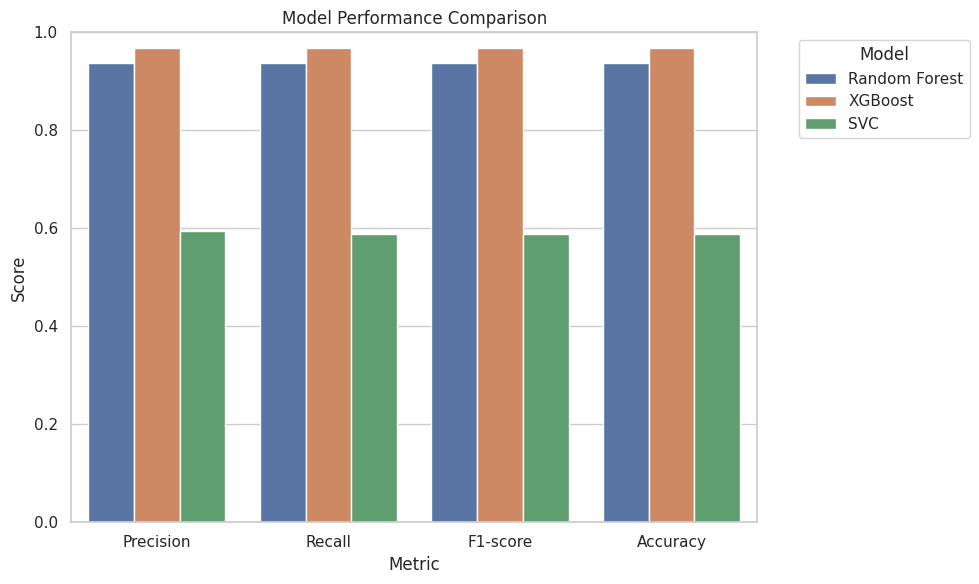

In [82]:
# Function to extract metrics
def get_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'accuracy': (y_true == y_pred).mean()
    }

# Collect metrics for all models
models = ['Random Forest', 'XGBoost', 'SVC',]
metrics = {
    'Model': [],
    'Metric': [],
    'Score': []
}

# Gather metrics for each model
for model in models:
    if model == 'Random Forest':
        results = get_metrics(y_test, y_pred_rf)
    elif model == 'XGBoost':
        results = get_metrics(y_test, y_pred_XG)
    elif model == 'SVC':
        results = get_metrics(y_test, y_pred_svc)

    for metric, score in results.items():
        metrics['Model'].append(model)
        metrics['Metric'].append(metric.capitalize())
        metrics['Score'].append(score)

metrics_df = pd.DataFrame(metrics)

sns.set(style='whitegrid')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [83]:
metrics_df = pd.DataFrame(metrics)

# Display the metrics as a table
print("Model Performance Metrics:")
print(metrics_df.pivot(index='Metric', columns='Model', values='Score').reset_index())

Model Performance Metrics:
Model     Metric  Random Forest       SVC   XGBoost
0       Accuracy       0.937500  0.588542  0.968750
1       F1-score       0.937534  0.588397  0.968726
2      Precision       0.937772  0.593675  0.968914
3         Recall       0.937500  0.588542  0.968750
